In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm
import matplotlib
pd.set_option('display.max_columns', None)
from six.moves import reduce
import scipy
from sklearn.metrics import r2_score
#scipy.stats.pearsonr
import scipy.stats as stats
plt.rcParams.update({'font.family': 'Arial'})
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('pred_visits_2019pred_2018params.csv')
df.shape

(1831026, 13)

In [3]:
df

,B_store,I_Includes_parking_lot,C_Percentage_of_Visits,D_Number_of_Visits,H_Area_of_store,R_Percentage_of_Visits_by_brand,G_Distance_between_cbg_and_store,J_POI_count_where_store_is,K_POI_diversity_where_store_is,L_Demographic_similarity,assumed_utility,assumed_visits,A_cbg
0,sg:51c8d943ff72400ab86e7e8896f4b5af,0.0,0.000000,0,2.767137,3.889299,2.791104,1.750881,8.368568,9.999995,5.886651316644441e-12,1.5952825068106435e-09,360610042001
1,sg:f189f91419974d03a20257132d73da58,1.0,0.000000,0,2.946087,3.889299,3.170047,1.719154,7.646898,9.999999,2.742908415935087e-12,7.433281807184085e-10,360610042001
2,sg:c7222887b3834a58a6bc40c168cdb38a,0.0,0.000000,0,1.040490,3.889299,1.212747,1.052879,4.730157,1.001538,1.101013548365782e-35,2.9837467160712688e-33,360610042001
3,sg:e2543bebe82742a1941c21660d9f4168,0.0,0.225092,61,1.391982,3.889299,1.135197,1.401880,7.512664,10.000000,0.4660513866575965,126.29992578420868,360610042001
4,sg:3275834c58d241baacdb9965f5003af6,1.0,0.000000,0,1.072624,3.889299,3.643312,1.401880,8.002375,9.999999,3.2486804366113063e-16,8.803923983216643e-14,360610042001
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1831021,sg:5aa2ec5e377c486ca69da4542b6e4307,1.0,0.000000,0,1.035848,1.000000,1.906477,3.707403,8.843649,10.000000,3.868501831742314e-24,2.321101099045389e-22,360610171006
1831022,sg:07fafdb3637c46e88d42a8fc2dce529a,1.0,0.000000,0,1.600084,1.000000,3.612197,1.327850,6.933696,9.999999,9.488247779169983e-32,5.692948667501989e-30,360610171006
1831023,sg:9bbf6c92e7cf4768a8cfdccab7bfb693,1.0,0.000000,0,1.743539,1.000000,2.822336,1.285546,7.416431,1.000000,4.242731403591763e-47,2.5456388421550575e-45,360610171006
1831024,sg:e4019da3119b4ebfac7b8f9907d68d7c,1.0,0.000000,0,1.005375,1.000000,1.425220,1.454759,7.115848,1.001588,3.537778705346861e-41,2.1226672232081162e-39,360610171006


In [4]:
df = df[~df.eq('no visitors in 2018').any(1)]

In [5]:
df['A_cbg'].nunique()

6298

In [6]:
df.columns

Index(['B_store', 'I_Includes_parking_lot', 'C_Percentage_of_Visits',
       'D_Number_of_Visits', 'H_Area_of_store',
       'R_Percentage_of_Visits_by_brand', 'G_Distance_between_cbg_and_store',
       'J_POI_count_where_store_is', 'K_POI_diversity_where_store_is',
       'L_Demographic_similarity', 'assumed_utility', 'assumed_visits',
       'A_cbg'],
      dtype='object')

In [7]:
df

,B_store,I_Includes_parking_lot,C_Percentage_of_Visits,D_Number_of_Visits,H_Area_of_store,R_Percentage_of_Visits_by_brand,G_Distance_between_cbg_and_store,J_POI_count_where_store_is,K_POI_diversity_where_store_is,L_Demographic_similarity,assumed_utility,assumed_visits,A_cbg
0,sg:51c8d943ff72400ab86e7e8896f4b5af,0.0,0.000000,0,2.767137,3.889299,2.791104,1.750881,8.368568,9.999995,5.886651316644441e-12,1.5952825068106435e-09,360610042001
1,sg:f189f91419974d03a20257132d73da58,1.0,0.000000,0,2.946087,3.889299,3.170047,1.719154,7.646898,9.999999,2.742908415935087e-12,7.433281807184085e-10,360610042001
2,sg:c7222887b3834a58a6bc40c168cdb38a,0.0,0.000000,0,1.040490,3.889299,1.212747,1.052879,4.730157,1.001538,1.101013548365782e-35,2.9837467160712688e-33,360610042001
3,sg:e2543bebe82742a1941c21660d9f4168,0.0,0.225092,61,1.391982,3.889299,1.135197,1.401880,7.512664,10.000000,0.4660513866575965,126.29992578420868,360610042001
4,sg:3275834c58d241baacdb9965f5003af6,1.0,0.000000,0,1.072624,3.889299,3.643312,1.401880,8.002375,9.999999,3.2486804366113063e-16,8.803923983216643e-14,360610042001
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1831021,sg:5aa2ec5e377c486ca69da4542b6e4307,1.0,0.000000,0,1.035848,1.000000,1.906477,3.707403,8.843649,10.000000,3.868501831742314e-24,2.321101099045389e-22,360610171006
1831022,sg:07fafdb3637c46e88d42a8fc2dce529a,1.0,0.000000,0,1.600084,1.000000,3.612197,1.327850,6.933696,9.999999,9.488247779169983e-32,5.692948667501989e-30,360610171006
1831023,sg:9bbf6c92e7cf4768a8cfdccab7bfb693,1.0,0.000000,0,1.743539,1.000000,2.822336,1.285546,7.416431,1.000000,4.242731403591763e-47,2.5456388421550575e-45,360610171006
1831024,sg:e4019da3119b4ebfac7b8f9907d68d7c,1.0,0.000000,0,1.005375,1.000000,1.425220,1.454759,7.115848,1.001588,3.537778705346861e-41,2.1226672232081162e-39,360610171006


<AxesSubplot:xlabel='H_Area_of_store', ylabel='C_Percentage_of_Visits'>

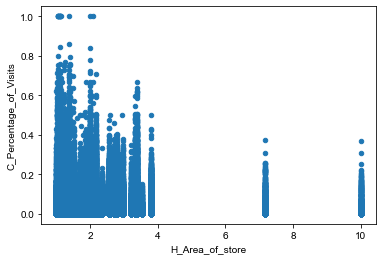

In [8]:
df.plot.scatter(x = 'H_Area_of_store', y = 'C_Percentage_of_Visits')

<AxesSubplot:xlabel='I_Includes_parking_lot', ylabel='C_Percentage_of_Visits'>

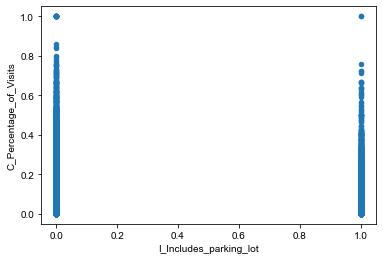

In [9]:
df.plot.scatter(x = 'I_Includes_parking_lot', y = 'C_Percentage_of_Visits')

<AxesSubplot:xlabel='R_Percentage_of_Visits_by_brand', ylabel='C_Percentage_of_Visits'>

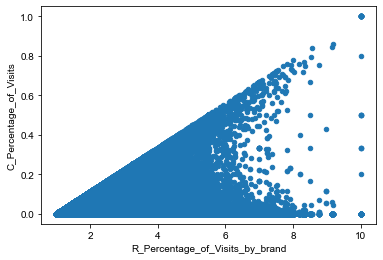

In [10]:
df.plot.scatter(x = 'R_Percentage_of_Visits_by_brand', y = 'C_Percentage_of_Visits')

<AxesSubplot:xlabel='J_POI_count_where_store_is', ylabel='C_Percentage_of_Visits'>

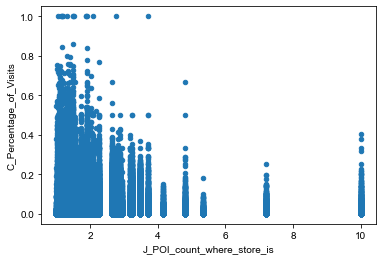

In [11]:
df.plot.scatter(x = 'J_POI_count_where_store_is', y = 'C_Percentage_of_Visits')

<AxesSubplot:xlabel='K_POI_diversity_where_store_is', ylabel='C_Percentage_of_Visits'>

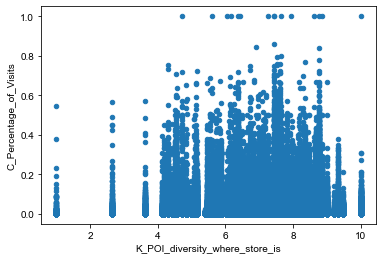

In [12]:
df.plot.scatter(x = 'K_POI_diversity_where_store_is', y = 'C_Percentage_of_Visits')

<AxesSubplot:xlabel='L_Demographic_similarity', ylabel='C_Percentage_of_Visits'>

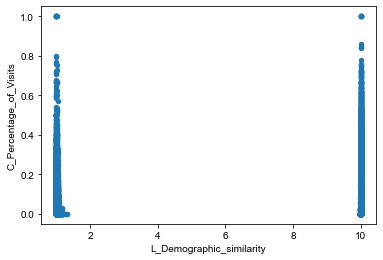

In [13]:
df.plot.scatter(x = 'L_Demographic_similarity', y = 'C_Percentage_of_Visits')

<AxesSubplot:xlabel='G_Distance_between_cbg_and_store', ylabel='C_Percentage_of_Visits'>

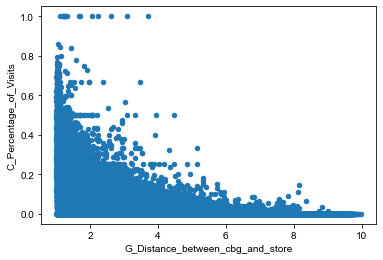

In [14]:
df.plot.scatter(x = 'G_Distance_between_cbg_and_store', y = 'C_Percentage_of_Visits')

# distribution of Parameters

In [15]:
param = pd.read_csv('PSO_7params_NYC_20210616_2018.csv')
param.shape

(6493, 9)

In [16]:
param.columns

Index(['cbg', 'cost', 'H_Area_of_store', 'I_Includes_parking_lot',
       'R_Percentage_of_Visits_by_brand', 'J_POI_count_where_store_is',
       'K_POI_diversity_where_store_is', 'L_Demographic_similarity',
       'G_Distance_between_cbg_and_store'],
      dtype='object')

In [17]:
param_plotting = param[['H_Area_of_store', 'I_Includes_parking_lot',
       'R_Percentage_of_Visits_by_brand', 'J_POI_count_where_store_is',
       'K_POI_diversity_where_store_is', 'L_Demographic_similarity',
       'G_Distance_between_cbg_and_store']]

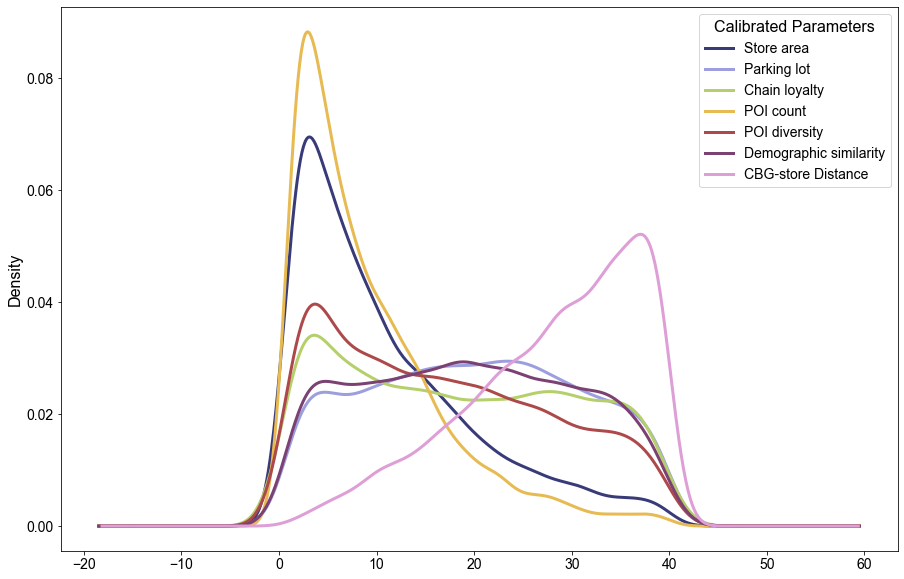

In [18]:

param_plotting[~param_plotting.eq('no visitors').any(1)].astype(float).plot.kde(figsize=(15,10),lw=3,
                                                                                colormap=cm.tab20b)
#plt.title('Parameter Distributions',size = 30,y=1.02)
plt.legend(title = 'Calibrated Parameters', fontsize = 14, 
           title_fontsize = 16,
           labels = ['Store area', 'Parking lot', 'Chain loyalty', 'POI count', 'POI diversity', 
                     'Demographic similarity', 'CBG-store Distance'])
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.ylabel('Density', fontsize = 16)
plt.savefig('Figure Reproduction/figures/Value Distribution of Calibrated Parameters.png', dpi=1000,bbox_inches='tight')
#plt.show()

<AxesSubplot:ylabel='Density'>

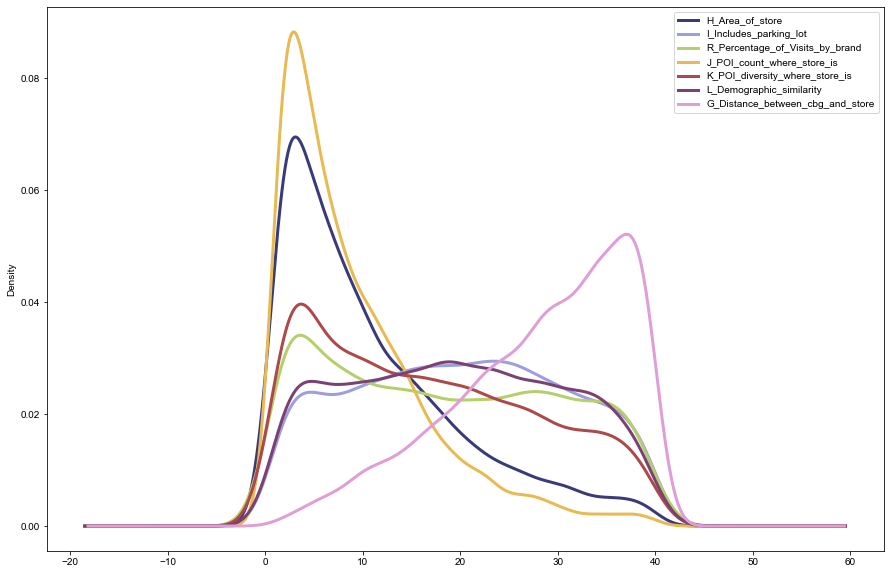

In [19]:
# this chunk is just to double check whether the legend labels are correct
param_plotting[~param_plotting.eq('no visitors').any(1)].astype(float).plot.kde(figsize=(15,10),lw=3,
                                                                                colormap=cm.tab20b)

In [20]:
param = param[~param.eq('no visitors').any(1)]
param.shape

(6298, 9)

In [21]:
param[['cost', 'H_Area_of_store', 'I_Includes_parking_lot',
       'R_Percentage_of_Visits_by_brand', 'J_POI_count_where_store_is',
       'K_POI_diversity_where_store_is', 'L_Demographic_similarity',
       'G_Distance_between_cbg_and_store']] = param[['cost', 'H_Area_of_store', 'I_Includes_parking_lot',
       'R_Percentage_of_Visits_by_brand', 'J_POI_count_where_store_is',
       'K_POI_diversity_where_store_is', 'L_Demographic_similarity',
       'G_Distance_between_cbg_and_store']].astype(float)

In [22]:
param

,cbg,cost,H_Area_of_store,I_Includes_parking_lot,R_Percentage_of_Visits_by_brand,J_POI_count_where_store_is,K_POI_diversity_where_store_is,L_Demographic_similarity,G_Distance_between_cbg_and_store
0,360471214001,0.027073,10.601947,5.323526,12.750215,15.079083,13.190062,25.832631,28.608641
1,360471220001,0.354500,5.846828,15.395847,16.519337,9.922379,26.377720,39.380953,37.604922
2,360471220002,0.103589,2.088900,38.368921,17.006861,14.653217,32.867343,20.665333,38.492082
3,360470546001,0.264455,9.666614,17.207457,31.633992,2.199153,18.298050,24.201564,23.352351
4,360470546003,0.218131,1.615208,31.583352,28.440904,1.641019,37.431833,36.048171,19.014460
...,...,...,...,...,...,...,...,...,...
6488,360610060001,0.171671,5.866356,22.616331,16.182237,6.671559,25.595195,9.337777,33.476106
6489,360610077003,0.223377,5.355199,31.030269,12.256551,1.577805,21.327420,8.405546,28.871557
6490,360610226002,0.369487,16.178367,19.537266,18.296621,13.299002,10.308289,10.381503,25.229657
6491,360610090003,0.631850,1.259607,24.867940,15.920292,2.965167,17.539245,6.103239,32.988885


<AxesSubplot:ylabel='Density'>

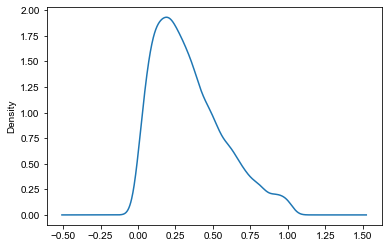

In [23]:
param['cost'].plot.kde()

# Performance

In [24]:
for i in ['H_Area_of_store', 'I_Includes_parking_lot',
       'R_Percentage_of_Visits_by_brand', 'J_POI_count_where_store_is',
       'K_POI_diversity_where_store_is', 'L_Demographic_similarity',
       'G_Distance_between_cbg_and_store']:
    param = param.rename(columns = {i:i + '_param'})

In [25]:
param.columns

Index(['cbg', 'cost', 'H_Area_of_store_param', 'I_Includes_parking_lot_param',
       'R_Percentage_of_Visits_by_brand_param',
       'J_POI_count_where_store_is_param',
       'K_POI_diversity_where_store_is_param',
       'L_Demographic_similarity_param',
       'G_Distance_between_cbg_and_store_param'],
      dtype='object')

In [26]:
variables = ['H_Area_of_store', 'I_Includes_parking_lot',
       'R_Percentage_of_Visits_by_brand',
       'J_POI_count_where_store_is',
       'K_POI_diversity_where_store_is',
       'L_Demographic_similarity',
       'G_Distance_between_cbg_and_store']

In [27]:
table_2019 = pd.read_csv('table_2019.csv')

In [28]:
#table_2019[(table_2019['B_store'] == 'sg:e2543bebe82742a1941c21660d9f4168') & (table_2019['A_cbg'] ==360610042001)]

In [29]:
df_pm = pd.merge(df,param.drop(columns = ['cost']), left_on = 'A_cbg', right_on = 'cbg', how='left').dropna()
df_pm

,B_store,I_Includes_parking_lot,C_Percentage_of_Visits,D_Number_of_Visits,H_Area_of_store,R_Percentage_of_Visits_by_brand,G_Distance_between_cbg_and_store,J_POI_count_where_store_is,K_POI_diversity_where_store_is,L_Demographic_similarity,assumed_utility,assumed_visits,A_cbg,cbg,H_Area_of_store_param,I_Includes_parking_lot_param,R_Percentage_of_Visits_by_brand_param,J_POI_count_where_store_is_param,K_POI_diversity_where_store_is_param,L_Demographic_similarity_param,G_Distance_between_cbg_and_store_param
0,sg:51c8d943ff72400ab86e7e8896f4b5af,0.0,0.000000,0,2.767137,3.889299,2.791104,1.750881,8.368568,9.999995,5.886651316644441e-12,1.5952825068106435e-09,360610042001,360610042001,3.189537,35.745498,12.982317,7.106672,3.344489,31.756765,32.487792
1,sg:f189f91419974d03a20257132d73da58,1.0,0.000000,0,2.946087,3.889299,3.170047,1.719154,7.646898,9.999999,2.742908415935087e-12,7.433281807184085e-10,360610042001,360610042001,3.189537,35.745498,12.982317,7.106672,3.344489,31.756765,32.487792
2,sg:c7222887b3834a58a6bc40c168cdb38a,0.0,0.000000,0,1.040490,3.889299,1.212747,1.052879,4.730157,1.001538,1.101013548365782e-35,2.9837467160712688e-33,360610042001,360610042001,3.189537,35.745498,12.982317,7.106672,3.344489,31.756765,32.487792
3,sg:e2543bebe82742a1941c21660d9f4168,0.0,0.225092,61,1.391982,3.889299,1.135197,1.401880,7.512664,10.000000,0.4660513866575965,126.29992578420868,360610042001,360610042001,3.189537,35.745498,12.982317,7.106672,3.344489,31.756765,32.487792
4,sg:3275834c58d241baacdb9965f5003af6,1.0,0.000000,0,1.072624,3.889299,3.643312,1.401880,8.002375,9.999999,3.2486804366113063e-16,8.803923983216643e-14,360610042001,360610042001,3.189537,35.745498,12.982317,7.106672,3.344489,31.756765,32.487792
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1776031,sg:5aa2ec5e377c486ca69da4542b6e4307,1.0,0.000000,0,1.035848,1.000000,1.906477,3.707403,8.843649,10.000000,3.868501831742314e-24,2.321101099045389e-22,360610171006,360610171006,5.366132,18.014995,36.367090,1.553968,10.471150,18.468852,24.588668
1776032,sg:07fafdb3637c46e88d42a8fc2dce529a,1.0,0.000000,0,1.600084,1.000000,3.612197,1.327850,6.933696,9.999999,9.488247779169983e-32,5.692948667501989e-30,360610171006,360610171006,5.366132,18.014995,36.367090,1.553968,10.471150,18.468852,24.588668
1776033,sg:9bbf6c92e7cf4768a8cfdccab7bfb693,1.0,0.000000,0,1.743539,1.000000,2.822336,1.285546,7.416431,1.000000,4.242731403591763e-47,2.5456388421550575e-45,360610171006,360610171006,5.366132,18.014995,36.367090,1.553968,10.471150,18.468852,24.588668
1776034,sg:e4019da3119b4ebfac7b8f9907d68d7c,1.0,0.000000,0,1.005375,1.000000,1.425220,1.454759,7.115848,1.001588,3.537778705346861e-41,2.1226672232081162e-39,360610171006,360610171006,5.366132,18.014995,36.367090,1.553968,10.471150,18.468852,24.588668


In [30]:
def get_predicted_raw_visit_share(vars_list, row_here):
    share_here = 0
    up_here, down_here = [], []
    
    if 'H_Area_of_store' in vars_list:
        up_here.append(row_here['H_Area_of_store']**row_here['H_Area_of_store_param'])
    if 'I_Includes_parking_lot' in vars_list:
        up_here.append((1+row_here['I_Includes_parking_lot_param'])**row_here['I_Includes_parking_lot'])
    if 'R_Percentage_of_Visits_by_brand' in vars_list:
        up_here.append(row_here['R_Percentage_of_Visits_by_brand']**row_here['R_Percentage_of_Visits_by_brand_param'])
    if 'J_POI_count_where_store_is' in vars_list:
        up_here.append(row_here['J_POI_count_where_store_is']**row_here['J_POI_count_where_store_is_param'])
    if 'K_POI_diversity_where_store_is' in vars_list:
        up_here.append(row_here['K_POI_diversity_where_store_is']**row_here['K_POI_diversity_where_store_is_param'])
    if 'L_Demographic_similarity' in vars_list:
        up_here.append(row_here['L_Demographic_similarity']**row_here['L_Demographic_similarity_param'])
    if 'G_Distance_between_cbg_and_store' in vars_list:
        down_here.append(row_here['G_Distance_between_cbg_and_store']**row_here['G_Distance_between_cbg_and_store_param'])
        
    if len(up_here) > 0:
        up_value = reduce(lambda x, y: x*y, up_here)
    else:
        up_value = 0
        
    if len(down_here) > 0:
        down_value = reduce(lambda x, y: x*y, down_here)
    else:
        down_value = 0
        
    if up_value != 0 and down_value == 0:
        return up_value
    if up_value == 0 and down_value != 0:
        return 1/down_value
    if up_value != 0 and down_value != 0:
        return up_value
    if up_value != 0 and down_value != 0:
        return up_value/down_value

In [31]:
variable_explaination = {'H_Area_of_store':'Store area', 
                         'I_Includes_parking_lot': 'Parking lot', 
                         'R_Percentage_of_Visits_by_brand': 'Chain loyalty', 
                         'J_POI_count_where_store_is': 'POI count', 
                         'K_POI_diversity_where_store_is': 'POI diversity',
                         'L_Demographic_similarity': 'Demographic similarity', 
                         'G_Distance_between_cbg_and_store': 'CBG-store Distance'}

In [32]:
df_pm.groupby('A_cbg')[['C_Percentage_of_Visits', 'D_Number_of_Visits']].sum().reset_index()

,A_cbg,C_Percentage_of_Visits,D_Number_of_Visits
0,360050001001,1.0,37
1,360050002001,1.0,596
2,360050002002,1.0,1045
3,360050002003,1.0,541
4,360050004000,1.0,12
...,...,...,...
6293,360850319012,1.0,952
6294,360850319021,1.0,988
6295,360850319022,1.0,1596
6296,360850319023,1.0,1245


In [33]:
def get_predicted_visits(vars_list, calibrated_params_here):
    #computed_df = df_pm.copy()
    
    for i in ['H_Area_of_store', 'I_Includes_parking_lot',
       'R_Percentage_of_Visits_by_brand', 'J_POI_count_where_store_is',
       'K_POI_diversity_where_store_is', 'L_Demographic_similarity',
       'G_Distance_between_cbg_and_store']:
        if i in calibrated_params_here:
            
            calibrated_params_here = calibrated_params_here[calibrated_params_here[i] != 'no visitors']            
            calibrated_params_here[i] = calibrated_params_here[i].astype(float)
            calibrated_params_here = calibrated_params_here.rename(columns = {i:i + '_param'})
    
    computed_df = pd.merge(df, calibrated_params_here.drop(columns = ['cost']), left_on = 'A_cbg', 
                           right_on = 'cbg', how='left').dropna()
    #vars_here = [i.split('_')[0] for i in vars_list]
    computed_df['result_before_norm'] = computed_df.apply(lambda x: get_predicted_raw_visit_share(vars_list, x), axis = 1)
    cbg_sum = computed_df.groupby('A_cbg')[['result_before_norm','D_Number_of_Visits']].sum().reset_index().rename(
        columns = {'result_before_norm':'result_cbg_sum', 'D_Number_of_Visits': 'Number_of_Visits_in_this_cbg'})
    computed_df_general = pd.merge(computed_df, cbg_sum, on = 'A_cbg', how = 'left')
    #return computed_df_general
    new_col_names = [variable_explaination[v] for v in vars_list]
    new_col = '_'.join(new_col_names)+'_pred_visits'
    computed_df_general[new_col] = computed_df_general.apply(
        lambda x: x['result_before_norm']/x['result_cbg_sum']*x['Number_of_Visits_in_this_cbg'], 
        axis = 1)
    #return pd.merge(df_pm, computed_df_general[['A_cbg', 'B_store', new_col]], on = ['A_cbg', 'B_store'], how = 'left')
    return computed_df_general[['A_cbg', 'B_store', 'D_Number_of_Visits', 'assumed_visits', new_col]]

# Pearson Correlations

In [34]:
df_pm['D_Number_of_Visits'] = df_pm['D_Number_of_Visits'].astype(int)
df_pm['assumed_visits'] = df_pm['assumed_visits'].astype(float)

## General

In [35]:
scipy.stats.pearsonr(df_pm['D_Number_of_Visits'], df_pm['assumed_visits'])

(0.6535149467929174, 0.0)

## Brand Visits correlation

In [36]:
store_brands = table_2019[['B_store', 'O_Brand_name']].drop_duplicates()
store_brands

,B_store,O_Brand_name
0,sg:51c8d943ff72400ab86e7e8896f4b5af,Target
1,sg:f189f91419974d03a20257132d73da58,Target
2,sg:c7222887b3834a58a6bc40c168cdb38a,Target
3,sg:e2543bebe82742a1941c21660d9f4168,Target
4,sg:3275834c58d241baacdb9965f5003af6,Target
...,...,...
1798561,sg:5aa2ec5e377c486ca69da4542b6e4307,Lou & Grey
1805054,sg:07fafdb3637c46e88d42a8fc2dce529a,Sears
1805055,sg:9bbf6c92e7cf4768a8cfdccab7bfb693,Sears
1818040,sg:e4019da3119b4ebfac7b8f9907d68d7c,Bottega Veneta


In [37]:
brand_df = pd.merge(df_pm, store_brands, on = 'B_store', how = 'left')

In [38]:
brand_df.head()

,B_store,I_Includes_parking_lot,C_Percentage_of_Visits,D_Number_of_Visits,H_Area_of_store,R_Percentage_of_Visits_by_brand,G_Distance_between_cbg_and_store,J_POI_count_where_store_is,K_POI_diversity_where_store_is,L_Demographic_similarity,assumed_utility,assumed_visits,A_cbg,cbg,H_Area_of_store_param,I_Includes_parking_lot_param,R_Percentage_of_Visits_by_brand_param,J_POI_count_where_store_is_param,K_POI_diversity_where_store_is_param,L_Demographic_similarity_param,G_Distance_between_cbg_and_store_param,O_Brand_name
0,sg:51c8d943ff72400ab86e7e8896f4b5af,0.0,0.000000,0,2.767137,3.889299,2.791104,1.750881,8.368568,9.999995,5.886651316644441e-12,1.595283e-09,360610042001,360610042001,3.189537,35.745498,12.982317,7.106672,3.344489,31.756765,32.487792,Target
1,sg:f189f91419974d03a20257132d73da58,1.0,0.000000,0,2.946087,3.889299,3.170047,1.719154,7.646898,9.999999,2.742908415935087e-12,7.433282e-10,360610042001,360610042001,3.189537,35.745498,12.982317,7.106672,3.344489,31.756765,32.487792,Target
2,sg:c7222887b3834a58a6bc40c168cdb38a,0.0,0.000000,0,1.040490,3.889299,1.212747,1.052879,4.730157,1.001538,1.101013548365782e-35,2.983747e-33,360610042001,360610042001,3.189537,35.745498,12.982317,7.106672,3.344489,31.756765,32.487792,Target
3,sg:e2543bebe82742a1941c21660d9f4168,0.0,0.225092,61,1.391982,3.889299,1.135197,1.401880,7.512664,10.000000,0.4660513866575965,1.262999e+02,360610042001,360610042001,3.189537,35.745498,12.982317,7.106672,3.344489,31.756765,32.487792,Target
4,sg:3275834c58d241baacdb9965f5003af6,1.0,0.000000,0,1.072624,3.889299,3.643312,1.401880,8.002375,9.999999,3.2486804366113063e-16,8.803924e-14,360610042001,360610042001,3.189537,35.745498,12.982317,7.106672,3.344489,31.756765,32.487792,Target


In [39]:
brand_visit_comparison = brand_df.groupby(['O_Brand_name'])['assumed_visits','D_Number_of_Visits'].sum().reset_index()
brand_visit_comparison
#brand_df.groupby(['O_Brand_name']).agg({'assumed_visits':'sum','D_Number_of_Visits':'sum'})

,O_Brand_name,assumed_visits,D_Number_of_Visits
0,Amazon 4-Star,228.032335,1503
1,BJ's Wholesale Club,159536.187923,173815
2,Barneys New York,2361.296113,10314
3,Bloomingdale's,41387.146564,47925
4,Bottega Veneta,2.159021,635
5,Costco Wholesale Corp.,197854.797106,190020
6,DAISO,25139.028201,28075
7,Dollar General,49880.015834,103653
8,Dollar Tree,354056.494565,375495
9,Family Dollar Stores,201450.133298,197309


In [40]:
scipy.stats.pearsonr(brand_visit_comparison['D_Number_of_Visits'], brand_visit_comparison['assumed_visits'])

(0.9207363012913898, 1.8468289466080073e-10)

## Store Visits correlation

In [41]:
store_visit_comparison = brand_df.groupby(['B_store'])['assumed_visits','D_Number_of_Visits'].sum().reset_index()
store_visit_comparison

,B_store,assumed_visits,D_Number_of_Visits
0,aggregated_4024_College,74863.823496,21740
1,aggregated_40W,59432.215788,30511
2,aggregated_517E,15185.662913,4490
3,sg:0031a04b56d64aecab115f342a98234b,9080.099707,39591
4,sg:00e39e94fa1a403d8314f5e251deb299,5981.854802,4609
...,...,...,...
277,sg:fcee52f5e49b4a02b4d161b6e12dfb4c,621.825622,3717
278,sg:fd4bf1e165794ab99140ca0bb2d5e022,11074.442625,11190
279,sg:fd79ecc3453c44e8922dbd22594aebd2,51065.815966,44065
280,sg:fe5e273c7b7f42e5b26636f524ac0b72,4015.491923,2531


In [42]:
scipy.stats.pearsonr(store_visit_comparison['D_Number_of_Visits'], store_visit_comparison['assumed_visits'])

(0.7738405818910183, 1.7963588772223607e-57)

# Sensitivity Analysis

## 1. With all parameters

In [43]:
scipy.stats.pearsonr(df_pm['D_Number_of_Visits'], df_pm['assumed_visits'])

(0.6535149467929174, 0.0)

## 2. 'G_Distance_between_cbg_and_store' + 'H_Area_of_store'

In [44]:
param_G_H = pd.read_csv(
    '/Users/yixu/Dropbox (LISH)/store_closure/calibrations/G_H/PSO_2params_NYC_G_H.csv')

sens_G_H_retrain = get_predicted_visits(['G_Distance_between_cbg_and_store','H_Area_of_store'], 
                                        param_G_H)

scipy.stats.pearsonr(sens_G_H_retrain['D_Number_of_Visits'], 
                     sens_G_H_retrain['CBG-store Distance_Store area_pred_visits'])

(0.046300407772561, 0.0)

## 3. 'G_Distance_between_cbg_and_store' + 'I_Includes_parking_lot'

In [45]:
param_G_I = pd.read_csv(
    '/Users/yixu/Dropbox (LISH)/store_closure/calibrations/G_I/PSO_2params_NYC_G_I.csv')

sens_G_I_retrain = get_predicted_visits(['G_Distance_between_cbg_and_store',
                                         'I_Includes_parking_lot'], 
                                        param_G_I)

scipy.stats.pearsonr(sens_G_I_retrain['D_Number_of_Visits'], 
                     sens_G_I_retrain['CBG-store Distance_Parking lot_pred_visits'])

(0.1119916754852909, 0.0)

## 4. 'G_Distance_between_cbg_and_store' + 'R_Percentage_of_Visits_by_brand'

In [46]:
param_G_R = pd.read_csv(
    '/Users/yixu/Dropbox (LISH)/store_closure/calibrations/G_R/PSO_2params_NYC_G_R.csv')

sens_G_R_retrain = get_predicted_visits(['G_Distance_between_cbg_and_store',
                                         'R_Percentage_of_Visits_by_brand'], 
                                        param_G_R)

scipy.stats.pearsonr(sens_G_R_retrain['D_Number_of_Visits'], 
                     sens_G_R_retrain['CBG-store Distance_Chain loyalty_pred_visits'])

(0.1973595251670646, 0.0)

## 5. 'G_Distance_between_cbg_and_store' + 'J_POI_count_where_store_is'

In [47]:
param_G_J = pd.read_csv(
    '/Users/yixu/Dropbox (LISH)/store_closure/calibrations/G_J/PSO_2params_NYC_G_J.csv')

sens_G_J_retrain = get_predicted_visits(['G_Distance_between_cbg_and_store',
                                         'J_POI_count_where_store_is'], 
                                        param_G_J)

scipy.stats.pearsonr(sens_G_J_retrain['D_Number_of_Visits'], 
                     sens_G_J_retrain['CBG-store Distance_POI count_pred_visits'])

(0.019012322881496072, 1.1696982207151431e-141)

## 6. 'G_Distance_between_cbg_and_store' + 'K_POI_diversity_where_store_is'

In [48]:
param_G_K = pd.read_csv(
    '/Users/yixu/Dropbox (LISH)/store_closure/calibrations/G_K/PSO_2params_NYC_G_K.csv')

sens_G_K_retrain = get_predicted_visits(['G_Distance_between_cbg_and_store',
                                         'K_POI_diversity_where_store_is'], 
                                        param_G_K)

scipy.stats.pearsonr(sens_G_K_retrain['D_Number_of_Visits'], 
                     sens_G_K_retrain['CBG-store Distance_POI diversity_pred_visits'])

(0.07479805576576809, 0.0)

## 7. 'G_Distance_between_cbg_and_store' + 'L_Demographic_similarity'

In [49]:
param_G_L = pd.read_csv(
    '/Users/yixu/Dropbox (LISH)/store_closure/calibrations/G_L/PSO_2params_NYC_G_L.csv')

sens_G_L_retrain = get_predicted_visits(['G_Distance_between_cbg_and_store',
                                         'L_Demographic_similarity'], 
                                        param_G_L)

scipy.stats.pearsonr(sens_G_L_retrain['D_Number_of_Visits'], 
                     sens_G_L_retrain['CBG-store Distance_Demographic similarity_pred_visits'])

(0.10441175199616665, 0.0)

# Chi-Square Goodness of Fit Test

## general

In [50]:
stats.chisquare(f_obs=df_pm[df_pm['D_Number_of_Visits']!=0]['D_Number_of_Visits'], 
                f_exp=df_pm[df_pm['D_Number_of_Visits']!=0]['assumed_visits'])

Power_divergenceResult(statistic=2.178902810150682e+88, pvalue=0.0)

## By CBG

In [51]:
chi_square_df = df_pm[['A_cbg', 'D_Number_of_Visits','assumed_visits']].dropna()

In [52]:
used_cbgs = df_pm['A_cbg'].unique().tolist()

In [53]:
chi_square_info = {'cbg':[], 'chi_square_statistic': [], 'chi_square_pvalue': []}
for u in used_cbgs:
    chi_square_df_temp = chi_square_df[chi_square_df['A_cbg'] == u]
    if chi_square_df_temp['D_Number_of_Visits'].sum() > 0:
        cs_result_here = stats.chisquare(f_obs=chi_square_df_temp['D_Number_of_Visits'], 
                    f_exp=chi_square_df_temp['assumed_visits'])
        chi_square_info['cbg'].append(u)
        chi_square_info['chi_square_statistic'].append(cs_result_here[0])
        chi_square_info['chi_square_pvalue'].append(cs_result_here[1])

In [54]:
chi_square_info_df = pd.DataFrame(chi_square_info)

In [55]:
chi_square_info_df[chi_square_info_df['chi_square_pvalue']<0.05]

,cbg,chi_square_statistic,chi_square_pvalue
0,360610042001,1.472422e+46,0.0
1,360610061003,2.009807e+31,0.0
2,360810618002,6.764673e+71,0.0
3,360050407025,7.366726e+69,0.0
4,360810427002,8.918783e+53,0.0
...,...,...,...
6265,360470136003,9.991834e+38,0.0
6266,360810022001,4.416605e+41,0.0
6267,360811010013,4.199816e+27,0.0
6268,360610277004,8.685496e+47,0.0


In [56]:
chi_square_info_df.shape

(6270, 3)

<AxesSubplot:ylabel='Density'>

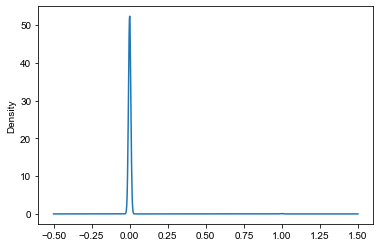

In [57]:
chi_square_info_df['chi_square_pvalue'].plot.kde()

In [58]:
pd.cut(chi_square_info_df['chi_square_pvalue'], bins=[0, 0.05], right = False).value_counts().reset_index()#.plot.bar()

,index,chi_square_pvalue
0,"[0.0, 0.05)",6258


# KS Test

## General

In [59]:
scipy.stats.kstest(df_pm['D_Number_of_Visits'], df_pm['assumed_visits'])

KstestResult(statistic=0.90797990581272, pvalue=0.0)

## By CBG

In [60]:
KS_score_by_cbg = {'cbg': [], 'ks_stat': [], 'ks_pvalue':[]}
for c in used_cbgs:
    ks_this_cbg_df = df_pm[(df_pm['A_cbg'] == c)]
    if ks_this_cbg_df['D_Number_of_Visits'].sum() > 0:
        KS_score_by_cbg['cbg'].append(c)
        ks_result_here = scipy.stats.kstest(ks_this_cbg_df['D_Number_of_Visits'], ks_this_cbg_df['assumed_visits'])
        KS_score_by_cbg['ks_stat'].append(ks_result_here[0])
        KS_score_by_cbg['ks_pvalue'].append(ks_result_here[1])

In [61]:
max(KS_score_by_cbg['ks_pvalue'])

2.4673024822937213e-58

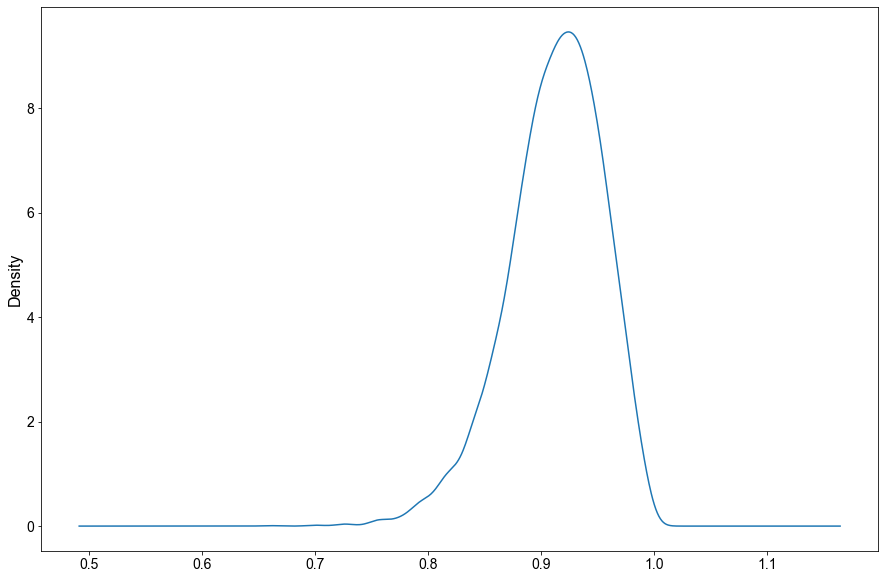

In [62]:
ks_score_by_cbg_df = pd.DataFrame(KS_score_by_cbg)
#ks_score_by_cbg_df[ks_score_by_cbg_df['ks_pvalue']<0.05]['ks_stat'].plot.kde(figsize=(15,10))
ks_score_by_cbg_df['ks_stat'].plot.kde(figsize=(15,10))
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.ylabel('Density', fontsize = 16)
plt.savefig('Figure Reproduction/figures/KS Stat Distribution in CBGs with visits in 2018.png', dpi=1000,bbox_inches='tight')

In [63]:
ks_score_by_cbg_df.shape

(6270, 3)

In [64]:
ks_score_by_cbg_df[ks_score_by_cbg_df['ks_pvalue']<0.05]

,cbg,ks_stat,ks_pvalue
0,360610042001,0.918440,4.607542e-128
1,360610061003,0.950355,3.168585e-141
2,360810618002,0.929078,3.058026e-132
3,360050407025,0.918440,4.607542e-128
4,360810427002,0.836879,9.839129e-101
...,...,...,...
6265,360470136003,0.936170,3.905131e-135
6266,360810022001,0.914894,1.038617e-126
6267,360811010013,0.861702,2.513449e-108
6268,360610277004,0.950355,3.168585e-141


# Linear Regression of normalized 2018 data

In [65]:
table_2018 = pd.read_csv('table_2018.csv')

In [66]:
table_2018.shape

(1831026, 19)

In [67]:
def convert(df, colname):
    list_here = df[colname].tolist()
    max_num = max(list_here)
    min_num = min(list_here)
    deno = max_num - min_num
    ans = []
    for i in list_here:
        this = ((i-min_num)/deno)*9 + 1
        ans.append(this)
    return ans

In [68]:
table_2018.columns

Index(['Unnamed: 0', 'A_cbg', 'B_store', 'C_Percentage_of_Visits_2018',
       'D_Number_of_Visits_2018', 'E_Population_in_this_cbg',
       'F_Population_where_store_is', 'G_Distance_between_cbg_and_store',
       'H_Area_of_store', 'I_Includes_parking_lot',
       'J_POI_count_where_store_is', 'K_POI_diversity_where_store_is',
       'L_Demographic_similarity', 'M_Median_Income_in_this_cbg',
       'N_Median_Income_where_store_is', 'O_Brand_name',
       'P_safegraph_brand_id', 'Q_Number_of_Visits_by_brand_2018',
       'R_Percentage_of_Visits_by_brand_2018'],
      dtype='object')

In [69]:
vars_2018_normalized = {}
for v in ['G_Distance_between_cbg_and_store', 'H_Area_of_store', 'L_Demographic_similarity', 'J_POI_count_where_store_is', 
          'K_POI_diversity_where_store_is','R_Percentage_of_Visits_by_brand_2018']:
    vars_2018_normalized[v] = convert(table_2018, v)

In [70]:
vars_2018_normalized['I_Includes_parking_lot'] = table_2018['I_Includes_parking_lot'].replace({0: 'No', 1: 'Yes', 0.0001: 'No'})
vars_2018_normalized['D_Number_of_Visits_2018'] = table_2018['D_Number_of_Visits_2018']

In [71]:
vars_2018_normalized_df = pd.DataFrame(vars_2018_normalized)

In [72]:
vars_2018_normalized_df.columns

Index(['G_Distance_between_cbg_and_store', 'H_Area_of_store',
       'L_Demographic_similarity', 'J_POI_count_where_store_is',
       'K_POI_diversity_where_store_is',
       'R_Percentage_of_Visits_by_brand_2018', 'I_Includes_parking_lot',
       'D_Number_of_Visits_2018'],
      dtype='object')

In [73]:
vars_2018_normalized_df['I_Includes_parking_lot'].value_counts()

No     1480404
Yes     350622
Name: I_Includes_parking_lot, dtype: int64

In [74]:
#vars_2018_normalized_df.to_csv('vars_2018_normalized_df.csv', index = False)

Continued regression work will be conducted in R (Linear Regression for Model Selection.Rmd).